# Supervised Learning Project-Keerthana

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('Bank_Personal_Loan_Modelling.csv')
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [4]:
data.shape

(5000, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


# EDA

In [6]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

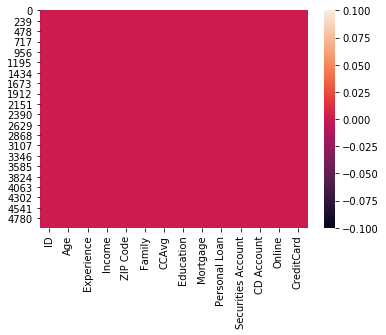

In [7]:
sns.heatmap(data.isnull())

In [8]:
data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

###  Data distribution of features

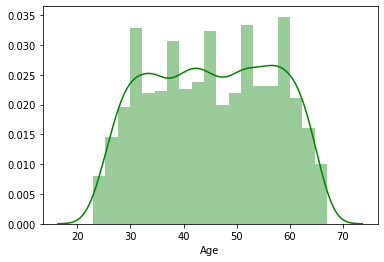

In [9]:
sns.distplot(data['Age'],color='green')

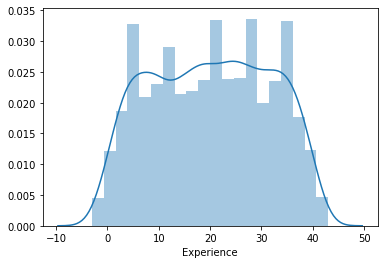

In [203]:
sns.distplot(data['Experience'])

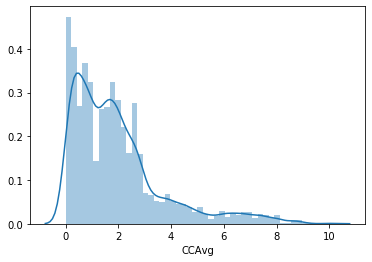

In [206]:
sns.distplot(data['CCAvg'])

In [207]:
data.skew(axis=0,skipna=True)

ID                     0.000000
Age                   -0.029341
Experience            -0.026325
Income                 0.841339
ZIP Code             -12.500221
Family                 0.155221
CCAvg                  1.598443
Education              0.227093
Mortgage               2.104002
Personal Loan          2.743607
Securities Account     2.588268
CD Account             3.691714
Online                -0.394785
CreditCard             0.904589
dtype: float64

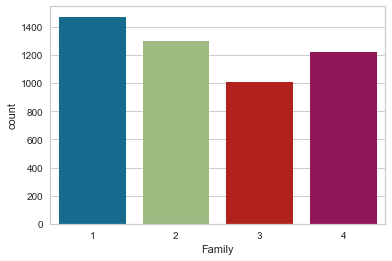

In [174]:
sns.countplot('Family',data=data)

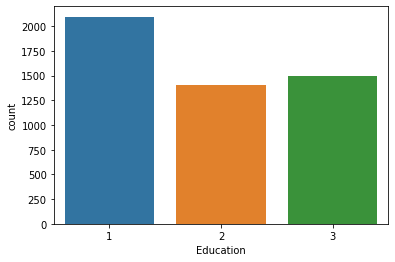

In [212]:
sns.countplot('Education',data=data)

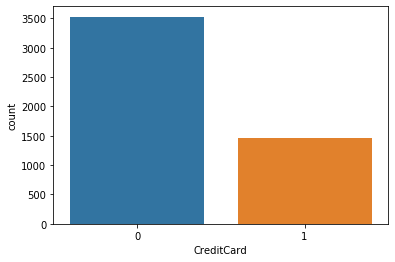

In [213]:
sns.countplot('CreditCard',data=data)

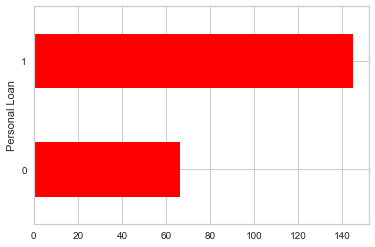

In [175]:
data.groupby('Personal Loan')['Income'].mean().plot(kind='barh',color='red')

In [176]:
(data['Personal Loan']).corr(data['Income'])

0.5024622924949339

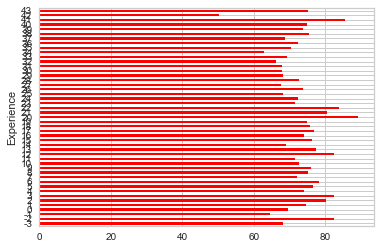

In [177]:
data.groupby('Experience')['Income'].mean().plot(kind='barh',color='red')

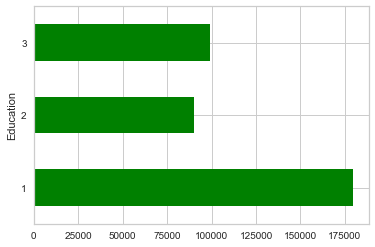

In [178]:
data.groupby('Education')['Income'].sum().plot(kind='barh',color='green')

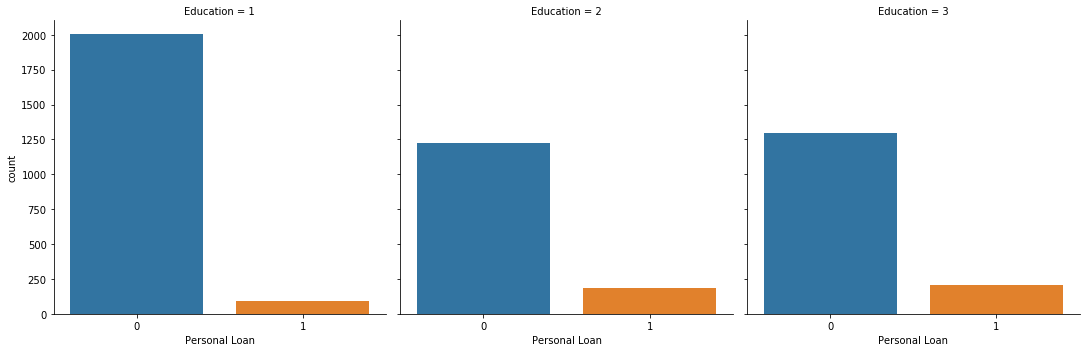

In [155]:
s=sns.factorplot(x='Personal Loan',col='Education',kind='count',data=data)


In [197]:
data[(data['Personal Loan']==1) & (data['Education']==2)].count()

ID                    182
Age                   182
Experience            182
Income                182
ZIP Code              182
Family                182
CCAvg                 182
Education             182
Mortgage              182
Personal Loan         182
Securities Account    182
CD Account            182
Online                182
CreditCard            182
dtype: int64

In [198]:
data[(data['Personal Loan']==1) & (data['Education']==3)].count()

ID                    205
Age                   205
Experience            205
Income                205
ZIP Code              205
Family                205
CCAvg                 205
Education             205
Mortgage              205
Personal Loan         205
Securities Account    205
CD Account            205
Online                205
CreditCard            205
dtype: int64

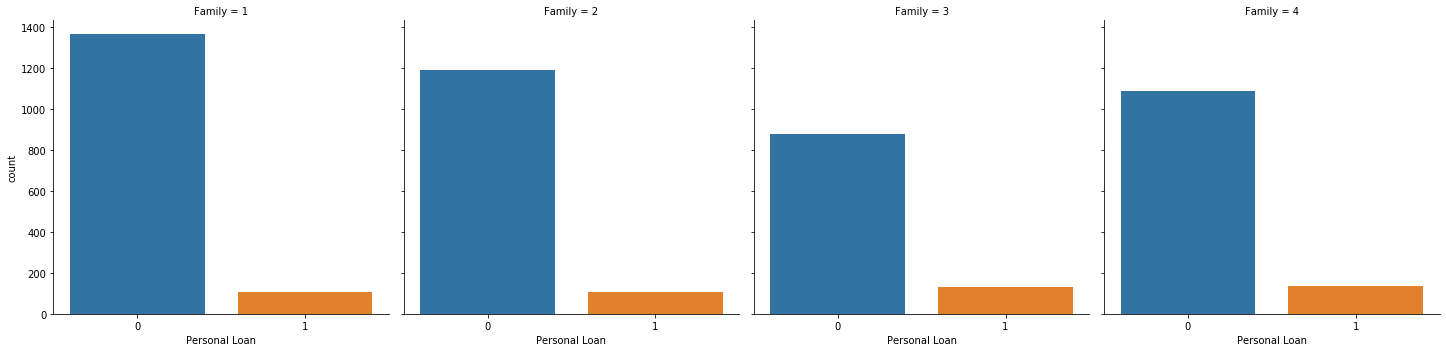

In [8]:
sns.factorplot(x='Personal Loan',col='Family',kind='count',data=data)

C:\Users\Vikee\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


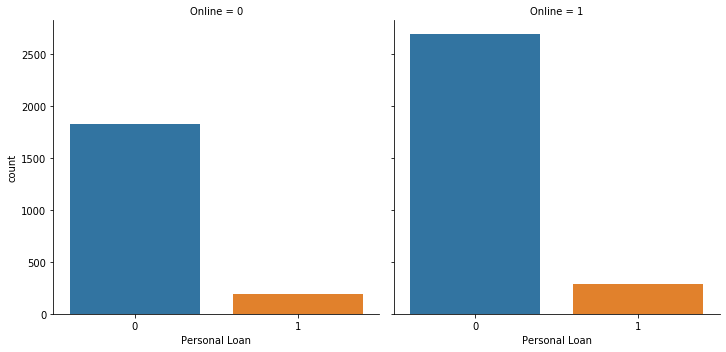

In [214]:
sns.factorplot(x='Personal Loan',col='Online',kind='count',data=data)

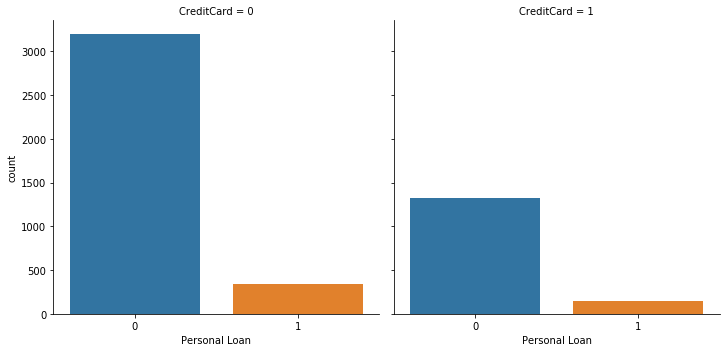

In [222]:
sns.factorplot(x='Personal Loan',col='CreditCard',kind='count',data=data)

In [117]:
data[(data['Personal Loan']==0) & (data['CreditCard']==1)].count()

ID                    1327
Age                   1327
Experience            1327
Income                1327
ZIP Code              1327
Family                1327
CCAvg                 1327
Education             1327
Mortgage              1327
Personal Loan         1327
Securities Account    1327
CD Account            1327
Online                1327
CreditCard            1327
dtype: int64

In [120]:
data[(data['Personal Loan']==1) & (data['CreditCard']==1)].count()

ID                    143
Age                   143
Experience            143
Income                143
ZIP Code              143
Family                143
CCAvg                 143
Education             143
Mortgage              143
Personal Loan         143
Securities Account    143
CD Account            143
Online                143
CreditCard            143
dtype: int64

In [122]:
data[ (data['CreditCard']==1)].count()

ID                    1470
Age                   1470
Experience            1470
Income                1470
ZIP Code              1470
Family                1470
CCAvg                 1470
Education             1470
Mortgage              1470
Personal Loan         1470
Securities Account    1470
CD Account            1470
Online                1470
CreditCard            1470
dtype: int64

In [121]:
data[ (data['CreditCard']==0)].count()

ID                    3530
Age                   3530
Experience            3530
Income                3530
ZIP Code              3530
Family                3530
CCAvg                 3530
Education             3530
Mortgage              3530
Personal Loan         3530
Securities Account    3530
CD Account            3530
Online                3530
CreditCard            3530
dtype: int64

In [216]:
data[(data['Personal Loan']==1) & (data['Online']==1)].count()

ID                    291
Age                   291
Experience            291
Income                291
ZIP Code              291
Family                291
CCAvg                 291
Education             291
Mortgage              291
Personal Loan         291
Securities Account    291
CD Account            291
Online                291
CreditCard            291
dtype: int64

In [217]:
data[(data['Personal Loan']==1) & (data['Online']==0)].count()

ID                    189
Age                   189
Experience            189
Income                189
ZIP Code              189
Family                189
CCAvg                 189
Education             189
Mortgage              189
Personal Loan         189
Securities Account    189
CD Account            189
Online                189
CreditCard            189
dtype: int64

In [124]:
data[(data['Online']==0)].count()

ID                    2016
Age                   2016
Experience            2016
Income                2016
ZIP Code              2016
Family                2016
CCAvg                 2016
Education             2016
Mortgage              2016
Personal Loan         2016
Securities Account    2016
CD Account            2016
Online                2016
CreditCard            2016
dtype: int64

In [125]:
data[(data['Online']==1)].count()

ID                    2984
Age                   2984
Experience            2984
Income                2984
ZIP Code              2984
Family                2984
CCAvg                 2984
Education             2984
Mortgage              2984
Personal Loan         2984
Securities Account    2984
CD Account            2984
Online                2984
CreditCard            2984
dtype: int64

In [218]:
data[(data['Personal Loan']==1) & (data['Securities Account']==1)].count()

ID                    60
Age                   60
Experience            60
Income                60
ZIP Code              60
Family                60
CCAvg                 60
Education             60
Mortgage              60
Personal Loan         60
Securities Account    60
CD Account            60
Online                60
CreditCard            60
dtype: int64

In [219]:
data[(data['Personal Loan']==1) & (data['Securities Account']==0)].count()

ID                    420
Age                   420
Experience            420
Income                420
ZIP Code              420
Family                420
CCAvg                 420
Education             420
Mortgage              420
Personal Loan         420
Securities Account    420
CD Account            420
Online                420
CreditCard            420
dtype: int64

In [123]:
data[(data['Securities Account']==0)].count()

ID                    4478
Age                   4478
Experience            4478
Income                4478
ZIP Code              4478
Family                4478
CCAvg                 4478
Education             4478
Mortgage              4478
Personal Loan         4478
Securities Account    4478
CD Account            4478
Online                4478
CreditCard            4478
dtype: int64

In [126]:
data[(data['CD Account']==0)].count()

ID                    4698
Age                   4698
Experience            4698
Income                4698
ZIP Code              4698
Family                4698
CCAvg                 4698
Education             4698
Mortgage              4698
Personal Loan         4698
Securities Account    4698
CD Account            4698
Online                4698
CreditCard            4698
dtype: int64

In [127]:
data[(data['CD Account']==1)].count()

ID                    302
Age                   302
Experience            302
Income                302
ZIP Code              302
Family                302
CCAvg                 302
Education             302
Mortgage              302
Personal Loan         302
Securities Account    302
CD Account            302
Online                302
CreditCard            302
dtype: int64

In [131]:
data[(data['Personal Loan']==1) & (data['CD Account']==1)].count()

ID                    140
Age                   140
Experience            140
Income                140
ZIP Code              140
Family                140
CCAvg                 140
Education             140
Mortgage              140
Personal Loan         140
Securities Account    140
CD Account            140
Online                140
CreditCard            140
dtype: int64

In [132]:
data[(data['Personal Loan']==0) & (data['CD Account']==1)].count()

ID                    162
Age                   162
Experience            162
Income                162
ZIP Code              162
Family                162
CCAvg                 162
Education             162
Mortgage              162
Personal Loan         162
Securities Account    162
CD Account            162
Online                162
CreditCard            162
dtype: int64

In [199]:
data[(data['Personal Loan']==1) & (data['Family']==3)].count()

ID                    133
Age                   133
Experience            133
Income                133
ZIP Code              133
Family                133
CCAvg                 133
Education             133
Mortgage              133
Personal Loan         133
Securities Account    133
CD Account            133
Online                133
CreditCard            133
dtype: int64

In [201]:
data[(data['Personal Loan']==1) & (data['Family']==2)].count()

ID                    106
Age                   106
Experience            106
Income                106
ZIP Code              106
Family                106
CCAvg                 106
Education             106
Mortgage              106
Personal Loan         106
Securities Account    106
CD Account            106
Online                106
CreditCard            106
dtype: int64

In [202]:
data[(data['Personal Loan']==1) & (data['Family']==4)].count()

ID                    134
Age                   134
Experience            134
Income                134
ZIP Code              134
Family                134
CCAvg                 134
Education             134
Mortgage              134
Personal Loan         134
Securities Account    134
CD Account            134
Online                134
CreditCard            134
dtype: int64

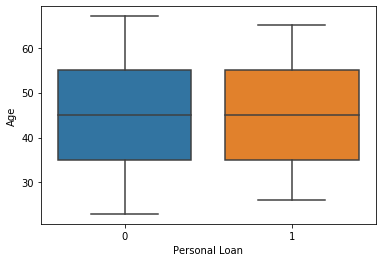

In [9]:
sns.boxplot(x='Personal Loan',y='Age',data=data)

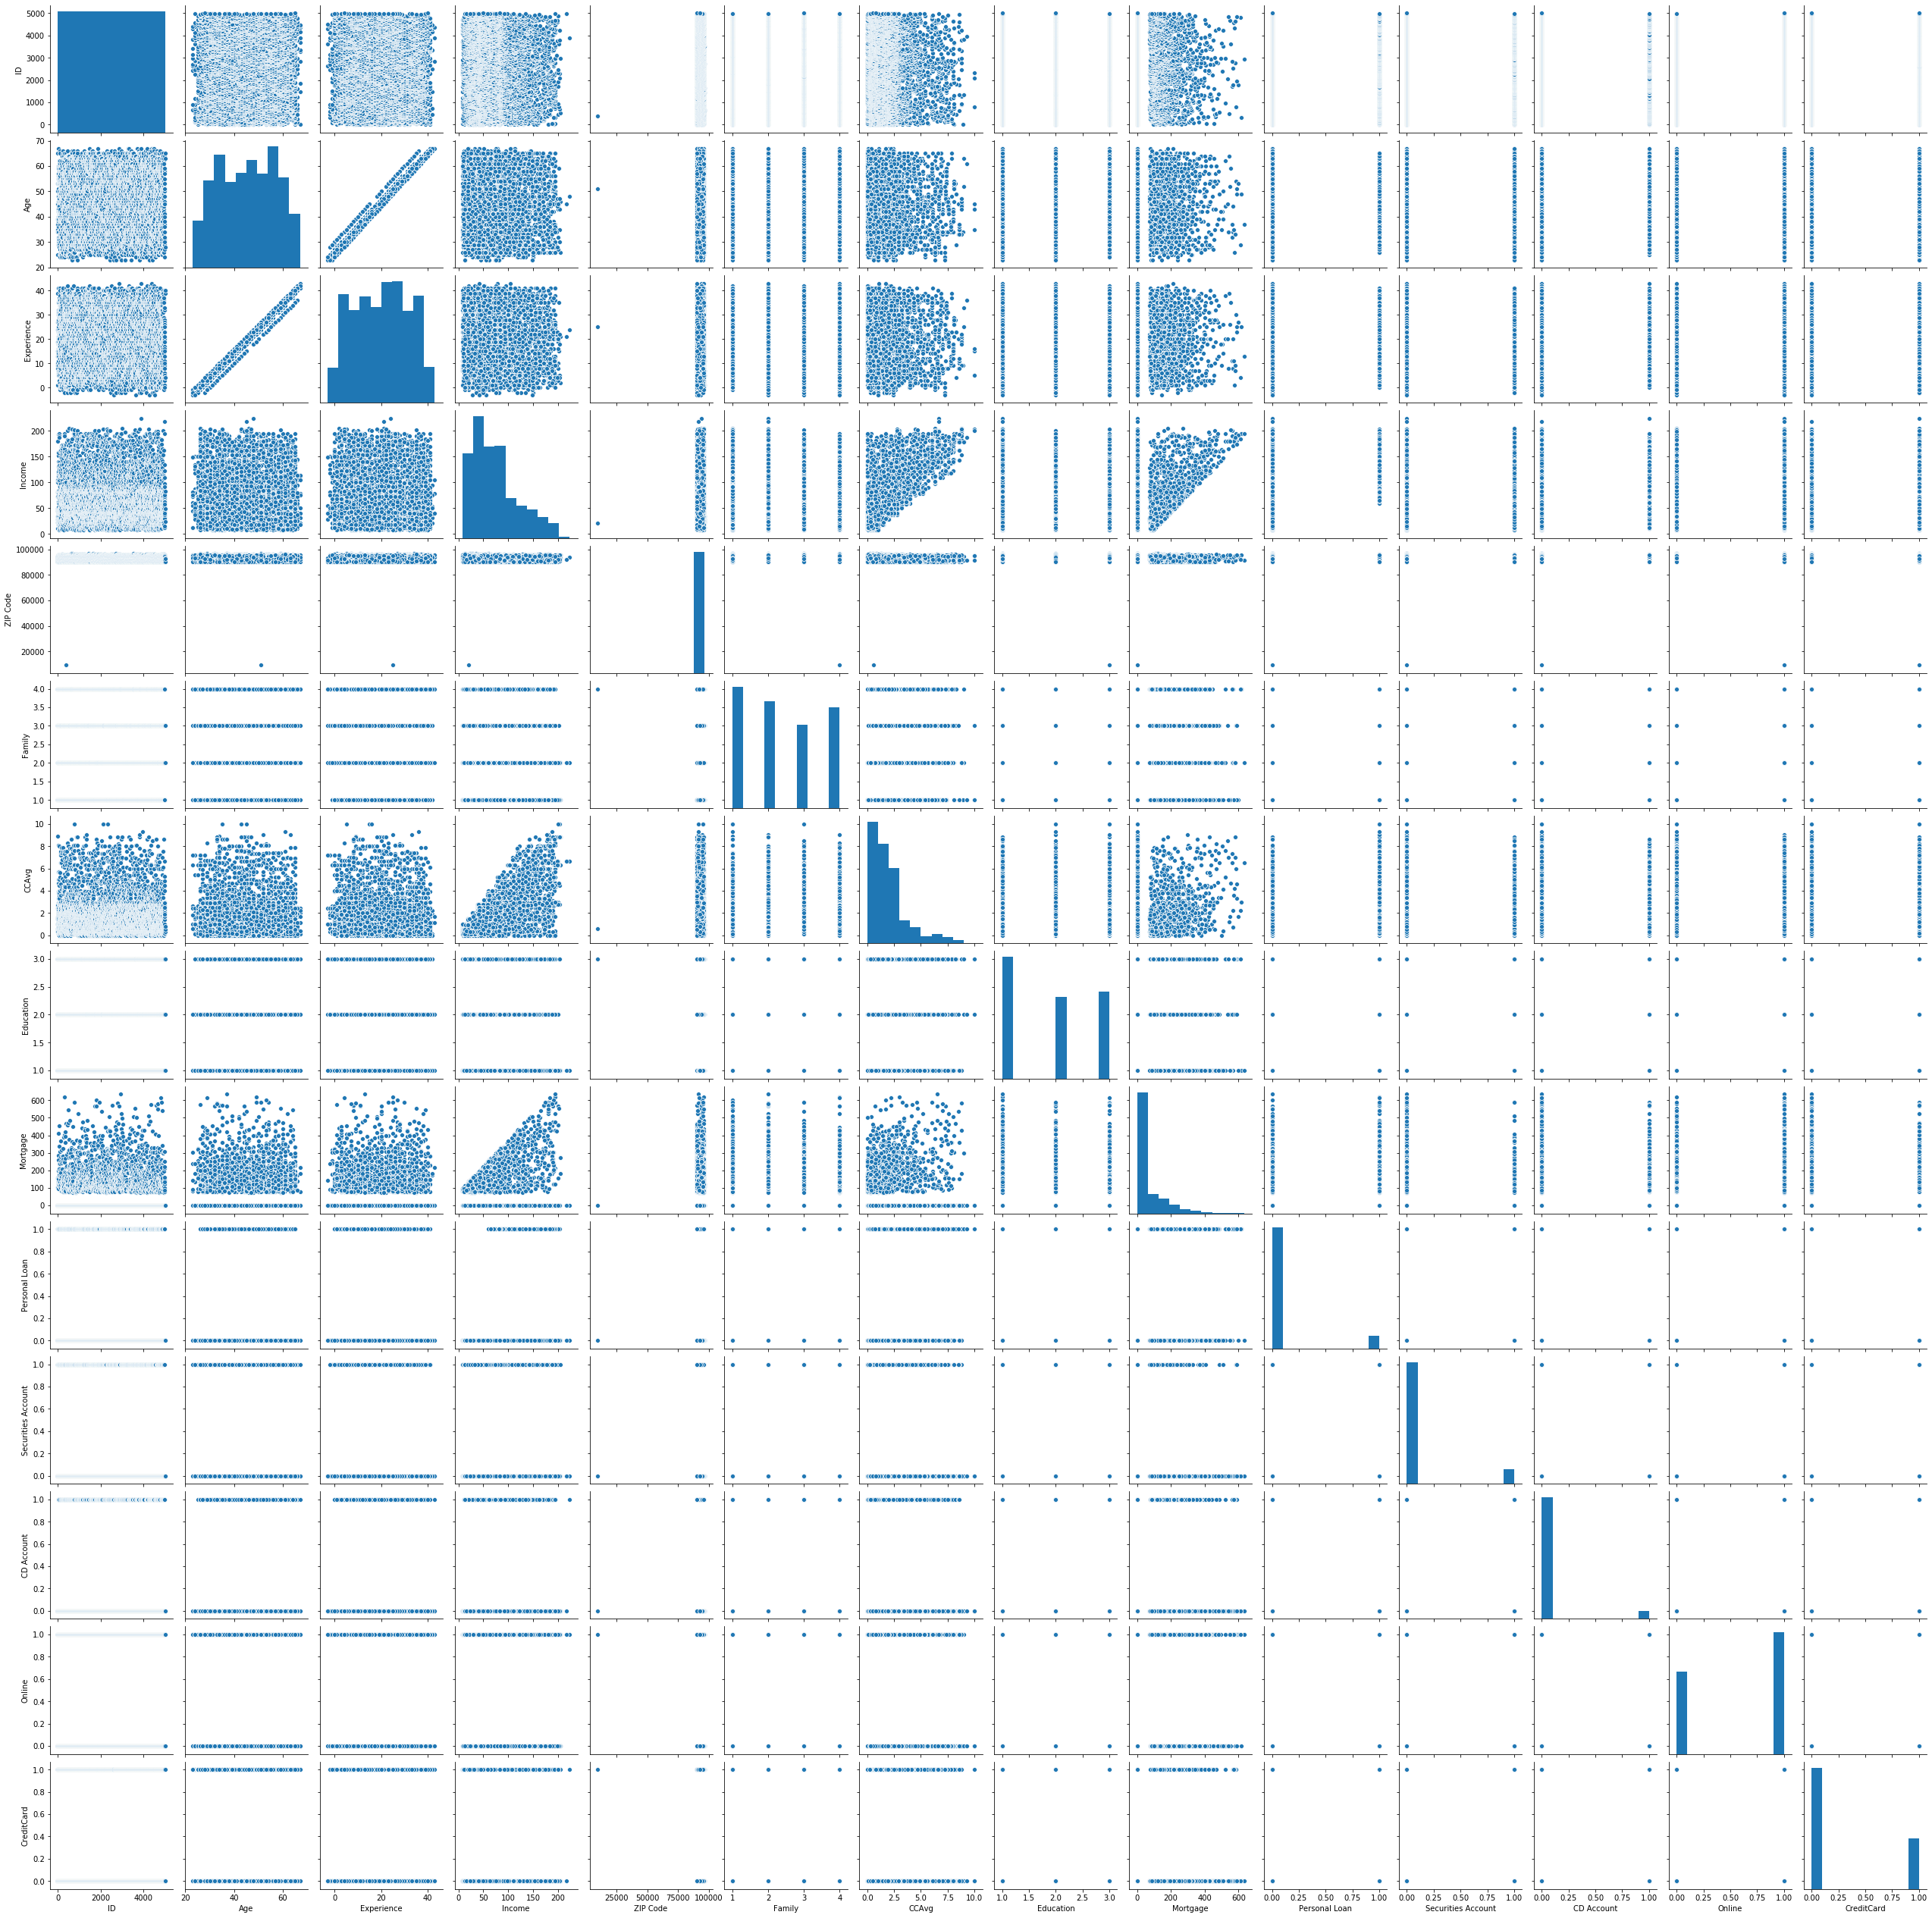

In [5]:
sns.pairplot(data)

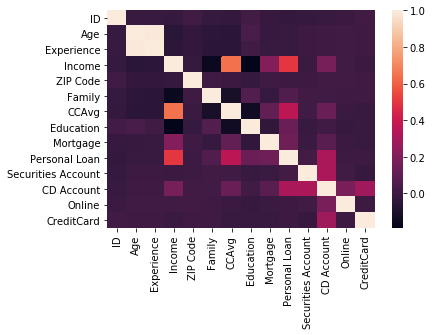

In [10]:
sns.heatmap(data.corr())

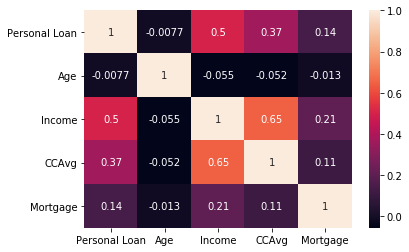

In [194]:

sns.heatmap(data[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].corr(), annot = True)

In [156]:
(data['CCAvg']).corr(data['Income'])

0.6459836696249652

In [158]:
(data['Personal Loan']).corr(data['Family'])

0.06136704401190931

In [220]:
(data['Personal Loan']).corr(data['CD Account'])

0.3163548294144038

In [14]:
qcutquantiles=pd.qcut(data['Age'], 10)  # to see the quantiles 

qcutquantiles1,intervals=pd.qcut(data['Age'], 10, retbins=True) 

# to see quantiles along with intervals limits, set retbins = True

In [15]:
qcutquantiles.value_counts()

(22.999, 30.0]    624
(45.0, 50.0]      611
(53.0, 57.0]      535
(57.0, 61.0]      524
(38.0, 42.0]      520
(30.0, 34.0]      499
(34.0, 38.0]      479
(61.0, 67.0]      425
(42.0, 45.0]      397
(50.0, 53.0]      386
Name: Age, dtype: int64

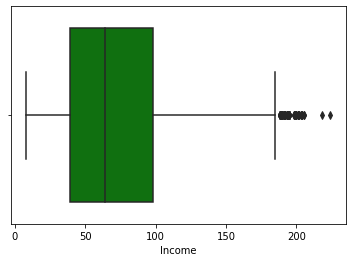

In [208]:
sns.boxplot(x= data.Income, color='green')

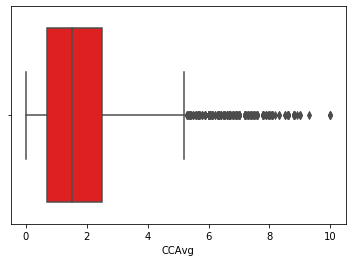

In [211]:
sns.boxplot(x= data.CCAvg, color='red')

# Data Distribution Observations:
______________________________________________________________

 ### 1) There are no missing values in attributes
 
### 2) From the above analysis, we see that majority of customers are aged between 22 and 30 and the next majrity lies between 45 to 50 age.
 
 ###  3) Majority of customers (205) who takes personal loan falls in the the education category  3. Advanced/Professional 
 
 ### 4) Next the level 2. Graduate people take more personal loan (182  customers) .
  
 ### 5) the majority of  1. Undergrad doesn't take personal loan . 
 
 ### 6) hence we see as the education level increases, necessity for personal loan increases
  
 ###  7) the Creditcardpermonth avg and income are highly correlated
 
 ### 8) As the family size increases, there is need to take personal loan. since we see family members with 4 count has taken mode loan compared to those with 1,2 and 3 members.
 
 ### 9) Undergrad education has more income compared to the education level 2. Graduate and 3. Advanced/Professional
 
 ### 10) the personal loan and income are highly correlated
 
 ### 11) CCAvg is highly skewed
 
 ### 12) age and experience are normally distributed
 
 ### 13) Income of majority of customers lies between 40 and 100k
 
 ### 14) Creditcardpermonth avg of majority of customers lies between 1 and 2.5K
 
### 15) Majority of customers (3530 customers) dont use the credit card issued by universal bank

### 16)Majority of the customer(4478 cutomers) doesn’t have a securities account  with the bank.

### 17) Customers who did not use credit card took more personal loan  than the ones who used the credit card

### 18) customers who had an online account took more personal loan (291) than the ones who did not have online account (189)

### 19) Majority of the customer(2984 cutomers) uses internet facilities online with the bank.

### 20) Majority of the customer(4478 cutomers)did not have certificate of deposit (CD) account with the bank

### 21) Majority of the customer who have certificate of deposit (CD) account with the bank) did not take personal loan  (162)

In [40]:
X=data.drop(['Personal Loan'],axis=1)
y=data['Personal Loan']

In [11]:
X

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0


In [12]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64

In [13]:
data['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [14]:
per=(4520)/(5000)*100
print ("Percentage is: ",per)

Percentage is:  90.4


## Target Column distribution observation :


  ###  we see 90% did not take personal loan

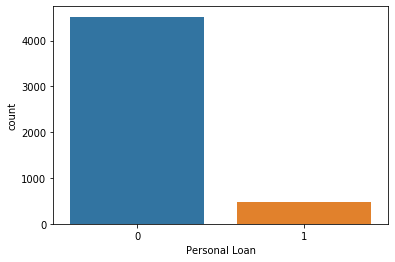

In [96]:
sns.countplot('Personal Loan',data=data)

# Train Test Split

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [42]:
X_train.shape ,y_train.shape

((3500, 13), (3500,))

In [43]:
X_test.shape ,y_test.shape

((1500, 13), (1500,))

# Model Building

# Logistic Regression Model


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [45]:
lr= LogisticRegression()

In [46]:
lr.fit(X_train,y_train)

C:\Users\Vikee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [47]:
predictions=lr.predict(X_test)

## Confusion Matrix for Logistic Regression Model

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,predictions)
print(confusion_matrix)

[[1353   19]
 [  63   65]]


In [49]:
print('\nTrue Positive    = ', confusion_matrix[0][0])
print('False Positive   = ',   confusion_matrix[0][1])
print('False Negative    = ',   confusion_matrix[1][0])
print('True Negative    = ',   confusion_matrix[1][1])


True Positive    =  1353
False Positive   =  19
False Negative    =  63
True Negative    =  65


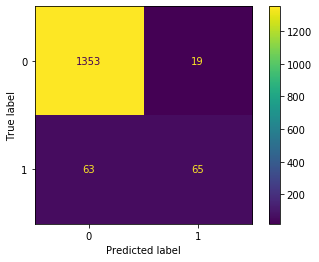

In [50]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr, X_test, y_test)

In [51]:
lr.score(X_test,y_test)


0.9453333333333334

#### scaling feaatures

In [52]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [53]:
Xscaled=scale.fit_transform(X)

In [54]:

X=pd.DataFrame(Xscaled,columns=X.columns)

In [55]:
X.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,0.0000,0.045455,0.086957,0.189815,0.936527,1.000000,0.16,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0002,0.500000,0.478261,0.120370,0.924872,0.666667,0.15,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0004,0.363636,0.391304,0.013889,0.977892,0.000000,0.10,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0006,0.272727,0.260870,0.425926,0.970931,0.000000,0.27,0.5,0.0,0.0,0.0,0.0,0.0
4,0.0008,0.272727,0.239130,0.171296,0.939080,1.000000,0.10,0.5,0.0,0.0,0.0,0.0,1.0


In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [57]:
lr= LogisticRegression()
lr.fit(X_train,y_train)
predictions=lr.predict(X_test)
logistic_accuracy=lr.score(X_test, y_test)
logistic_accuracy

0.9506666666666667

In [111]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.9506666666666667

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,predictions)
print(confusion_matrix)

[[1354   18]
 [  56   72]]


In [59]:
print('\nTrue Positive    = ', confusion_matrix[0][0])
print('False Positive   = ',   confusion_matrix[0][1])
print('False Negative    = ',   confusion_matrix[1][0])
print('True Negative    = ',   confusion_matrix[1][1])


True Positive    =  1354
False Positive   =  18
False Negative    =  56
True Negative    =  72


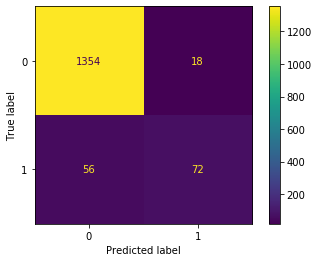

In [60]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr, X_test, y_test)

In [61]:
from sklearn.metrics import classification_report
classification_report = classification_report(y_test,predictions)
print(classification_report)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1372
           1       0.80      0.56      0.66       128

    accuracy                           0.95      1500
   macro avg       0.88      0.77      0.82      1500
weighted avg       0.95      0.95      0.95      1500



## Logistic Regression Observations:

### we get recall value 0f 56% 

### the accuracy of Logistic regression model is 95%

### we get 1426 correct predictions.

# KNN Model

In [63]:
X=data.drop(['Personal Loan'],axis=1)
y=data['Personal Loan']

In [64]:
X

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0


In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
prediction=knn.predict(X_test)
knn.score(X_test,y_test)




0.9146666666666666

In [68]:
# we get accuracy as 0.9146666666666666

In [69]:
from sklearn.metrics import f1_score

In [70]:
def elbow(k):
    test_error=[]
    for i in k:
        kn=KNeighborsClassifier(n_neighbors=i)
        kn.fit(X_train,y_train)
        pred=kn.predict(X_test)
        tmp=f1_score(y_test,pred)
        error=1-tmp
        test_error.append(error)
    return test_error

In [71]:
k=range(3,20,2)
test=elbow(k)

Text(0.5, 1.0, 'Elbow curve')

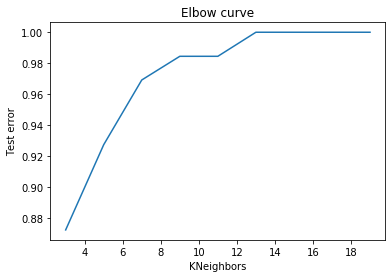

In [72]:
plt.plot(k,test)
plt.xlabel('KNeighbors')
plt.ylabel('Test error')
plt.title('Elbow curve')

In [73]:
knn1=KNeighborsClassifier(n_neighbors=7)
knn1.fit(X_train,y_train)
prediction=knn1.predict(X_test)
knn1.score(X_test,y_test)

0.916

## Confusion Matrix for KNN Model

In [74]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,prediction)
print(confusion_matrix)

[[1372    0]
 [ 126    2]]


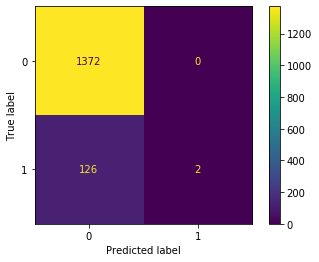

In [75]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn1, X_test, y_test)

In [76]:
print('\nTrue Positive    = ', confusion_matrix[0][0])
print('False Positive   = ',   confusion_matrix[0][1])
print('False Negative    = ',   confusion_matrix[1][0])
print('True Negative    = ',   confusion_matrix[1][1])


True Positive    =  1372
False Positive   =  0
False Negative    =  126
True Negative    =  2


In [77]:
# 1374 correct predicitions , 126 wrong predictions

### since KNN involves distance calculation, we need to scale the data 



In [88]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [89]:
X_scaled=scale.fit_transform(X)

In [90]:
X=pd.DataFrame(X_scaled,columns=X.columns)

In [91]:
X.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,0.0000,0.045455,0.086957,0.189815,0.936527,1.000000,0.16,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0002,0.500000,0.478261,0.120370,0.924872,0.666667,0.15,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0004,0.363636,0.391304,0.013889,0.977892,0.000000,0.10,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0006,0.272727,0.260870,0.425926,0.970931,0.000000,0.27,0.5,0.0,0.0,0.0,0.0,0.0
4,0.0008,0.272727,0.239130,0.171296,0.939080,1.000000,0.10,0.5,0.0,0.0,0.0,0.0,1.0


In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [112]:
knn2=KNeighborsClassifier(n_neighbors=7)
knn2.fit(X_train,y_train)
prediction=knn2.predict(X_test)
knn_accuracy=knn2.score(X_test,y_test)
knn_accuracy

0.9566666666666667

In [113]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.9566666666666667

#### accuracy increases after scaling

In [94]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,prediction)
print(confusion_matrix)

[[1368    4]
 [  61   67]]


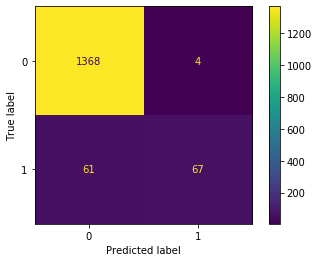

In [95]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn2, X_test, y_test)

In [96]:
print('\nTrue Positive    = ', confusion_matrix[0][0])
print('False Positive   = ',   confusion_matrix[0][1])
print('False Negative    = ',   confusion_matrix[1][0])
print('True Negative    = ',   confusion_matrix[1][1])


True Positive    =  1368
False Positive   =  4
False Negative    =  61
True Negative    =  67


In [97]:
from sklearn.metrics import classification_report
classification_report = classification_report(y_test,predictions)
print(classification_report)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1372
           1       0.80      0.56      0.66       128

    accuracy                           0.95      1500
   macro avg       0.88      0.77      0.82      1500
weighted avg       0.95      0.95      0.95      1500



## KNN  Observations:

### we get recall value 0f 56% 

### the accuracy of KNN model is 95.6%

### we get 1435 correct predictions.

# Naive Bayes Model

In [99]:
from sklearn.naive_bayes import GaussianNB 

nb= GaussianNB()

nb.fit(X_train,y_train)

GaussianNB()

In [109]:
predict=nb.predict(X_test)
accuracy=nb.score(X_test,y_test)

In [114]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict)

0.8853333333333333

## Confusion Matrix for Naive Bayes Model

In [101]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,predict)
print(confusion_matrix)

[[1254  118]
 [  54   74]]


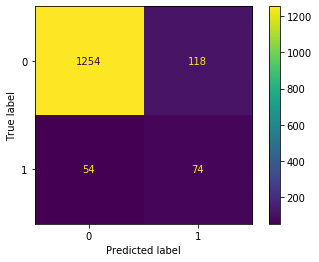

In [102]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nb, X_test, y_test)

In [103]:
print('\nTrue Positive    = ', confusion_matrix[0][0])
print('False Positive   = ',   confusion_matrix[0][1])
print('False Negative    = ',   confusion_matrix[1][0])
print('True Negative    = ',   confusion_matrix[1][1])


True Positive    =  1254
False Positive   =  118
False Negative    =  54
True Negative    =  74


In [104]:
from sklearn.metrics import roc_curve, auc

In [105]:
naive_accuracy=metrics.roc_auc_score(y_test,predict)

In [106]:
naive_accuracy

0.746059584548105

In [107]:
from sklearn.metrics import classification_report
classification_report = classification_report(y_test,predict)
print(classification_report)

              precision    recall  f1-score   support

           0       0.96      0.91      0.94      1372
           1       0.39      0.58      0.46       128

    accuracy                           0.89      1500
   macro avg       0.67      0.75      0.70      1500
weighted avg       0.91      0.89      0.90      1500



## Naive Bayes  Observations:

### we get recall value 0f 58% 

### the accuracy of Naive Bayes model is 88%

### we get 1328 correct predictions.

# Models Comparison


In [108]:
print ("Accuracy of Logistic Regression Model : ",logistic_accuracy)
print ("Accuracy of Logistic Regression Model : ",knn_accuracy)
print ("Accuracy of Logistic Regression Model : ",naive_accuracy)

Accuracy of Logistic Regression Model :  0.9506666666666667
Accuracy of Logistic Regression Model :  0.9566666666666667
Accuracy of Logistic Regression Model :  0.746059584548105


# Conclusion

Thera bank has used 3 models  to explore ways of converting its liability customers to personal loan customers (while
retaining them as depositors)

Among the 3 models used - Logistic Regression, KNN and naive bayes,

we see that :
KNN has high accuracy than the other 2 models.
We can use KNN as our final model.